In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata

SpatialData object with:
├── Images
│     ├── 'clahe': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'raw_image': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tiling_correction': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tophat_filtered': SpatialImage[cyx] (1, 12864, 10720)
│     └── 'transcript_density': SpatialImage[cyx] (1, 12864, 10720)
├── Labels
│     └── 'segmentation_mask': SpatialImage[yx] (12864, 10720)
├── Points
│     └── 'transcripts': DataFrame with shape: (4754932, 3) (2D points)
├── Shapes
│     ├── 'expanded_cells20': GeoDataFrame shape: (11228, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_segmentation': GeoDataFrame shape: (50, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_size': GeoDataFrame shape: (280, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_boundaries_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_

In [3]:
n_pca = np.count_nonzero(sdata.table.uns['pca']['variance_ratio'] > 0.01)
make_umap(sdata,n_PCAs=n_pca,n_neighbors=15) # umap only used for the visualization, does not have an effect on the annotation with 'score_genes'

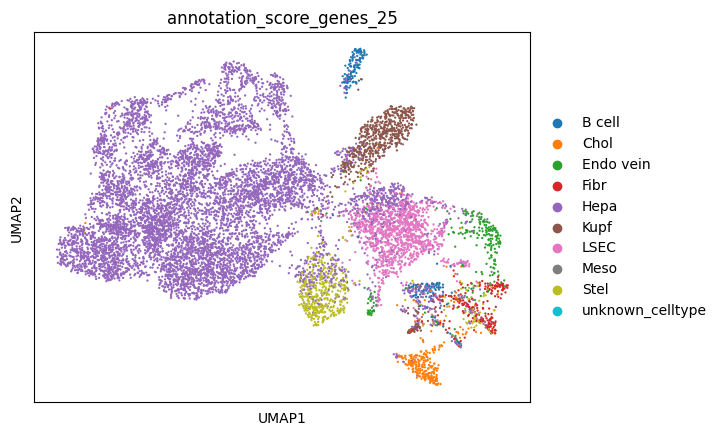

               atlas  annotation_score_genes_25
B cell      0.621451                   1.950481
Chol        2.673310                   2.511578
Hepa       57.998500                  70.137157
Kupf        3.203686                   5.860349
LSEC        9.241401                  10.758817
Meso        2.796528                   0.115782
Endo vein   3.166185                   2.066263
Fibr        3.042966                   2.030638
Stel       13.768349                   4.551122
Unknown     3.487625                   0.017813


In [4]:
# Do score_genes with basic marker gene list
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
mg_dict, scoresper_cluster = score_genes_bins(
    sdata = sdata,
    path_marker_genes = path_mg,
    bins = 25)
visualize_classification(sdata,'annotation_score_genes_25','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

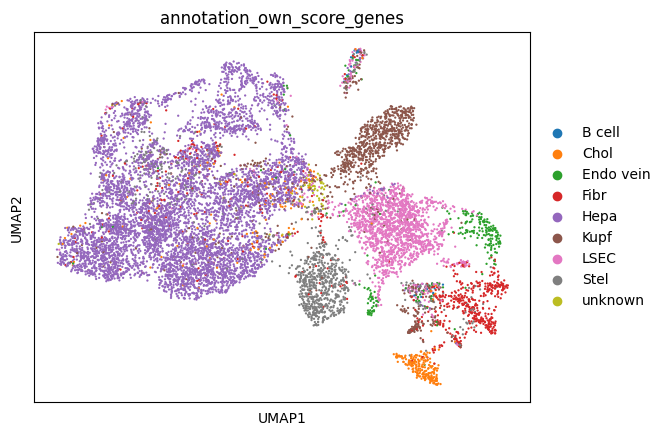

               atlas  annotation_own_score_genes
B cell      0.621451                    0.169220
Chol        2.673310                    3.295333
Hepa       57.998500                   54.836124
Kupf        3.203686                    9.698967
LSEC        9.241401                   14.695404
Meso        2.796528                         NaN
Endo vein   3.166185                    2.431421
Fibr        3.042966                    5.931600
Stel       13.768349                    8.416459
Unknown     3.487625                    0.525472


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,9.820017,0.000000,1.292701,2.536034,1.928780,-0.623206,0.485637,-0.012486,-0.006638
1,-1.021282,2.556514,0.000000,-1.260380,34.415525,-1.982905,29.656195,-0.012486,0.387969
2,-1.114434,0.000000,0.000000,-0.575746,1.929319,-1.082053,44.610389,-0.012486,0.683085
3,0.727245,0.000000,0.000000,0.302519,0.000000,-1.022648,21.499582,-0.012486,0.232001
4,1.656523,0.000000,0.000000,1.716927,0.000000,0.774956,0.667706,-0.012486,-0.006638
...,...,...,...,...,...,...,...,...,...
11223,3.722478,0.000000,0.000000,1.288451,0.000000,1.063498,0.470456,-0.012486,-0.006638
11224,9.018530,0.000000,0.000000,2.223787,4.642609,1.708828,1.302151,-0.012486,-0.006638
11225,4.816479,0.000000,0.000000,1.257715,4.680447,-1.536977,-0.428134,-0.012486,-0.006638
11226,-3.642087,0.000000,0.000000,-0.802778,5.658974,33.116480,22.177697,-0.012486,-0.006638


In [5]:
scores = own_score_genes(sdata,path_mg)
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

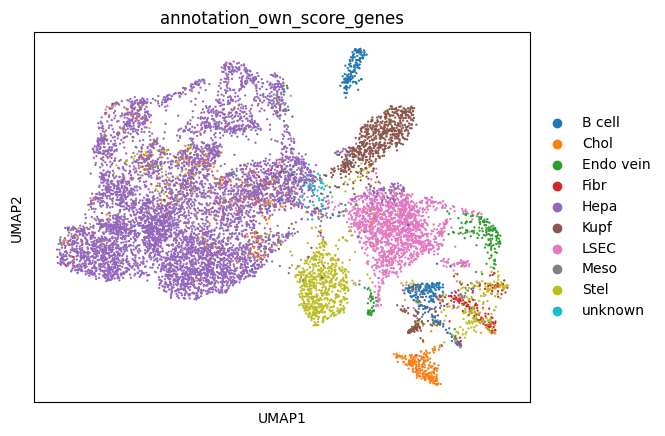

               atlas  annotation_own_score_genes
B cell      0.621451                    3.215176
Chol        2.673310                    4.453153
Hepa       57.998500                   57.793017
Kupf        3.203686                    7.142857
LSEC        9.241401                   13.697898
Meso        2.796528                    0.952975
Endo vein   3.166185                    2.066263
Fibr        3.042966                    1.585322
Stel       13.768349                    8.567866
Unknown     3.487625                    0.525472


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.320880,0.000000,0.000000,0.007757,0.000000,0.000000,0.000000,0.0,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.333277,0.000000,0.210321,0.0,0.387969
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.331554,0.0,0.683085
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.144196,0.0,0.232001
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
11223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
11224,0.277005,0.000000,0.000000,0.001780,0.006621,0.000000,0.000000,0.0,0.000000
11225,0.046972,0.000000,0.000000,0.000000,0.007037,0.000000,0.000000,0.0,0.000000
11226,0.000000,0.000000,0.000000,0.000000,0.017773,0.540298,0.149693,0.0,0.000000


In [6]:
# With norm_expr_var = True and norm_cell_type_score = ZeroMax
scores = own_score_genes(sdata,path_mg,scale_score='ZeroMax')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

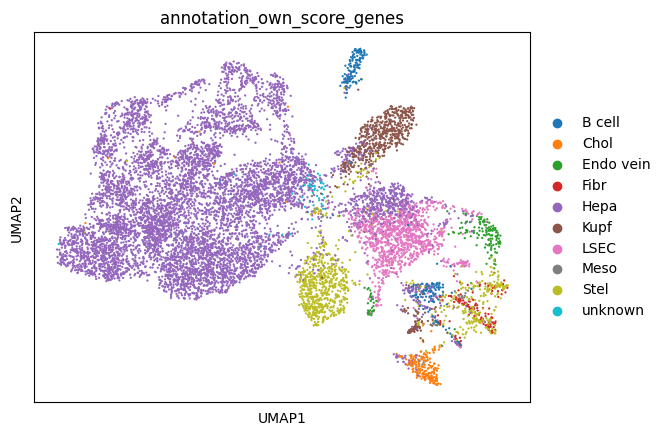

               atlas  annotation_own_score_genes
B cell      0.621451                    2.413609
Chol        2.673310                    1.905949
Hepa       57.998500                   68.329177
Kupf        3.203686                    5.806911
LSEC        9.241401                   10.046313
Meso        2.796528                    0.338440
Endo vein   3.166185                    1.505166
Fibr        3.042966                    1.015319
Stel       13.768349                    8.113644
Unknown     3.487625                    0.525472


In [8]:
# With norm_expr_var = True and scale_score = MinMax
own_score_genes(sdata,path_mg,scale_score='MinMax')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

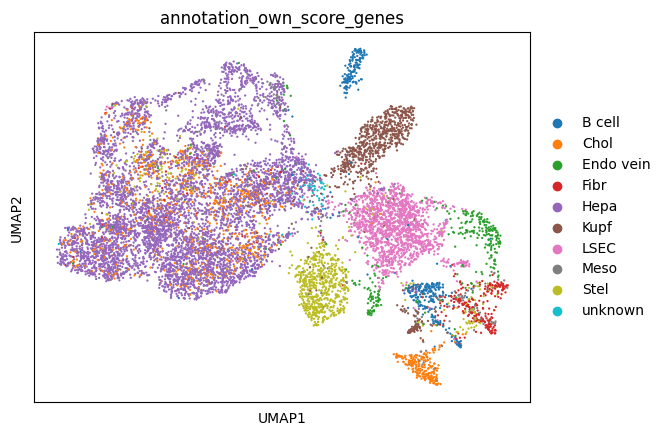

               atlas  annotation_own_score_genes
B cell      0.621451                    3.669398
Chol        2.673310                    9.734592
Hepa       57.998500                   50.561097
Kupf        3.203686                    7.436765
LSEC        9.241401                   13.519772
Meso        2.796528                    2.101888
Endo vein   3.166185                    2.965800
Fibr        3.042966                    2.467047
Stel       13.768349                    7.018169
Unknown     3.487625                    0.525472


In [9]:
# With norm_expr_var = True and scale_score = Nmarkers
own_score_genes(sdata,path_mg,scale_score='Nmarkers')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)